This dataset is taken from UK Accidents severity prediction from 2005-2015 from kaggle. Severity (3 class) of an accident is predicted from the conditions of the road, weather etc.Gaussian Naive Bayes model is used in prediction of the severity of accidents. 

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Accidents0514.csv')
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [4]:
len(data)

1640597

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
Accident_Index                                 1640597 non-null object
Location_Easting_OSGR                          1640486 non-null float64
Location_Northing_OSGR                         1640486 non-null float64
Longitude                                      1640486 non-null float64
Latitude                                       1640486 non-null float64
Police_Force                                   1640597 non-null int64
Accident_Severity                              1640597 non-null int64
Number_of_Vehicles                             1640597 non-null int64
Number_of_Casualties                           1640597 non-null int64
Date                                           1640597 non-null object
Day_of_Week                                    1640597 non-null int64
Time                                           1640464 non-null object
Local_Authority_(District)          

In [6]:
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1.640486e+06,1.640486e+06,1.640486e+06,1.640486e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,...,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06
mean,4.396051e+05,2.992476e+05,-1.436955e+00,5.258114e+01,3.082617e+01,2.838592e+00,1.831300e+00,1.351167e+00,4.117038e+00,3.540821e+02,...,3.795958e+02,9.437418e-03,7.288530e-01,1.950406e+00,1.581204e+00,1.363473e+00,1.099368e-01,7.308498e-02,1.357430e+00,1.193024e+00
std,9.550360e+04,1.614937e+05,1.404020e+00,1.454157e+00,2.554203e+01,4.017734e-01,7.152789e-01,8.260983e-01,1.924815e+00,2.593715e+02,...,1.300225e+03,1.280032e-01,1.808608e+00,1.648006e+00,1.652381e+00,6.296258e-01,7.331669e-01,6.229790e-01,4.794250e-01,4.007670e-01
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
25%,3.754842e+05,1.781200e+05,-2.367761e+00,5.148886e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,4.403800e+05,2.666200e+05,-1.398668e+00,5.229034e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,5.230200e+05,3.969900e+05,-2.216495e-01,5.346786e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.320000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,6.555400e+05,1.208800e+06,1.762010e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,...,9.999000e+03,2.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00


In [7]:
data.describe(include='O')

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,1640597,1640597,1640464,1640597,1520023
unique,1640597,3652,1439,207,35464
top,200620M047703,21/10/2005,17:00,E10000016,E01000004
freq,1,822,16011,44987,2367


In [8]:
df=data.dropna()

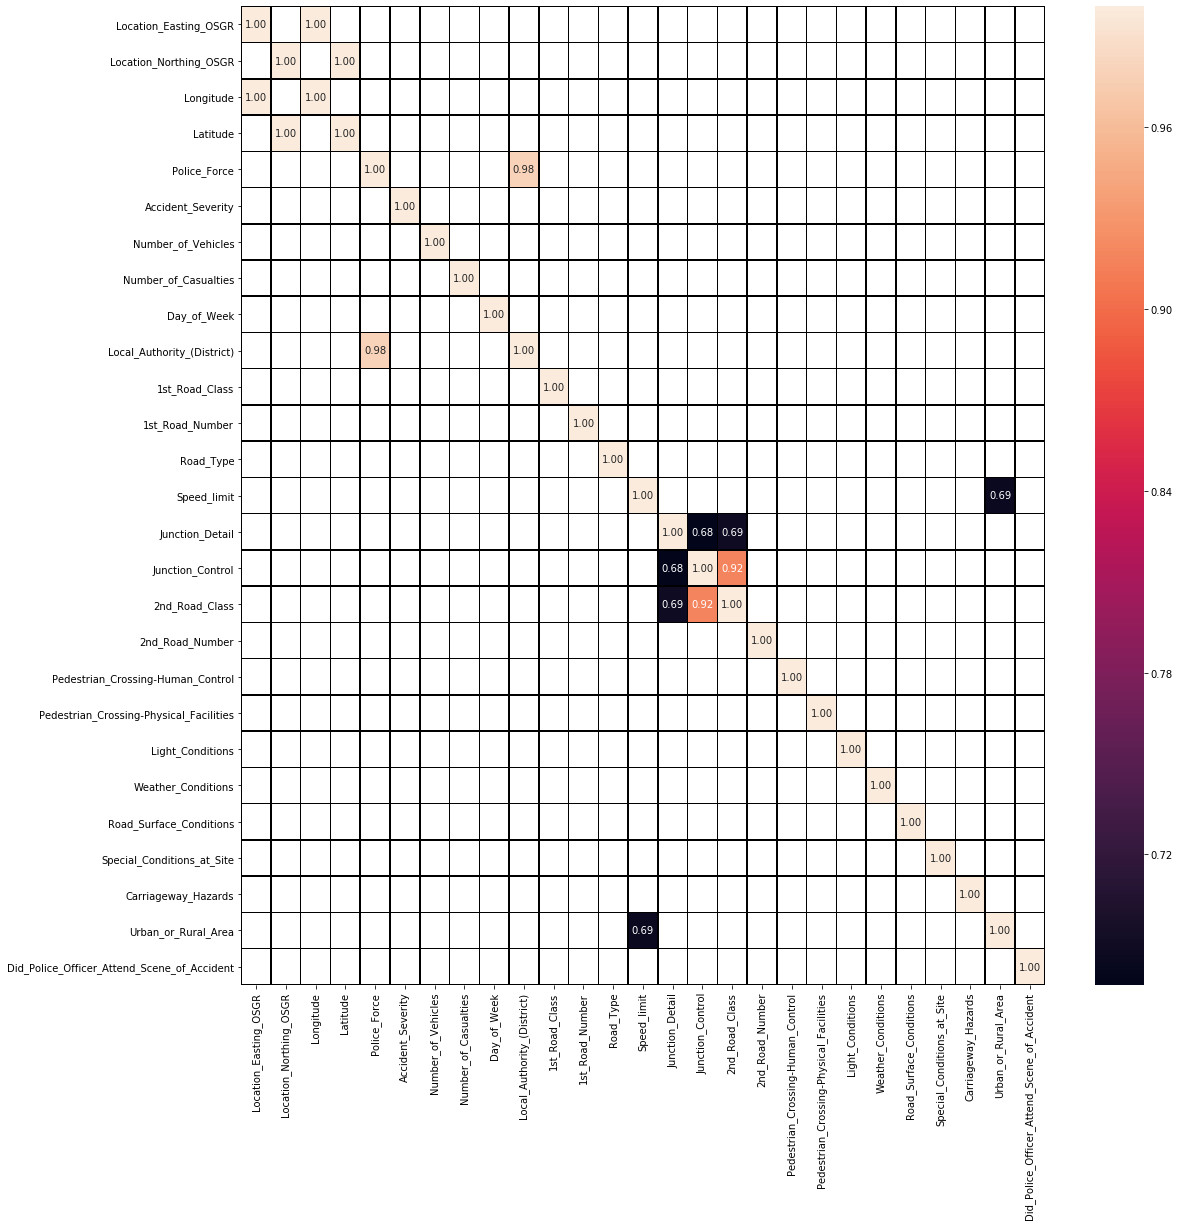

In [9]:
plt.figure(figsize=(18,18))
corr=df.corr()
correlation=corr[corr>0.5]
sns.heatmap(correlation,annot=True,fmt='.2f',linewidths=0.5,linecolor='black')

Observation:
    <li>'Location_easting_OSGR' and 'Longitude' are highly correlated</li>
    <li>'Location_Northing_OSGR' and 'Latitude' are highly correlated</li>
    <li>'Junction_Control' and '2nd_Road_Class' are  correlated</li>
    <li>'Junction_Detail' and '2nd_Road_Class' are correlated</li>
    <li>'Junction_Detail' and 'Junction_Control' are correlated</li>
    <li>'Local_Authority_(District)' and 'Police_Force' are highly correlated</li>
    <li>'Urban_Or_Rural_Area' and 'Speed_Limit' are  correlated</li>

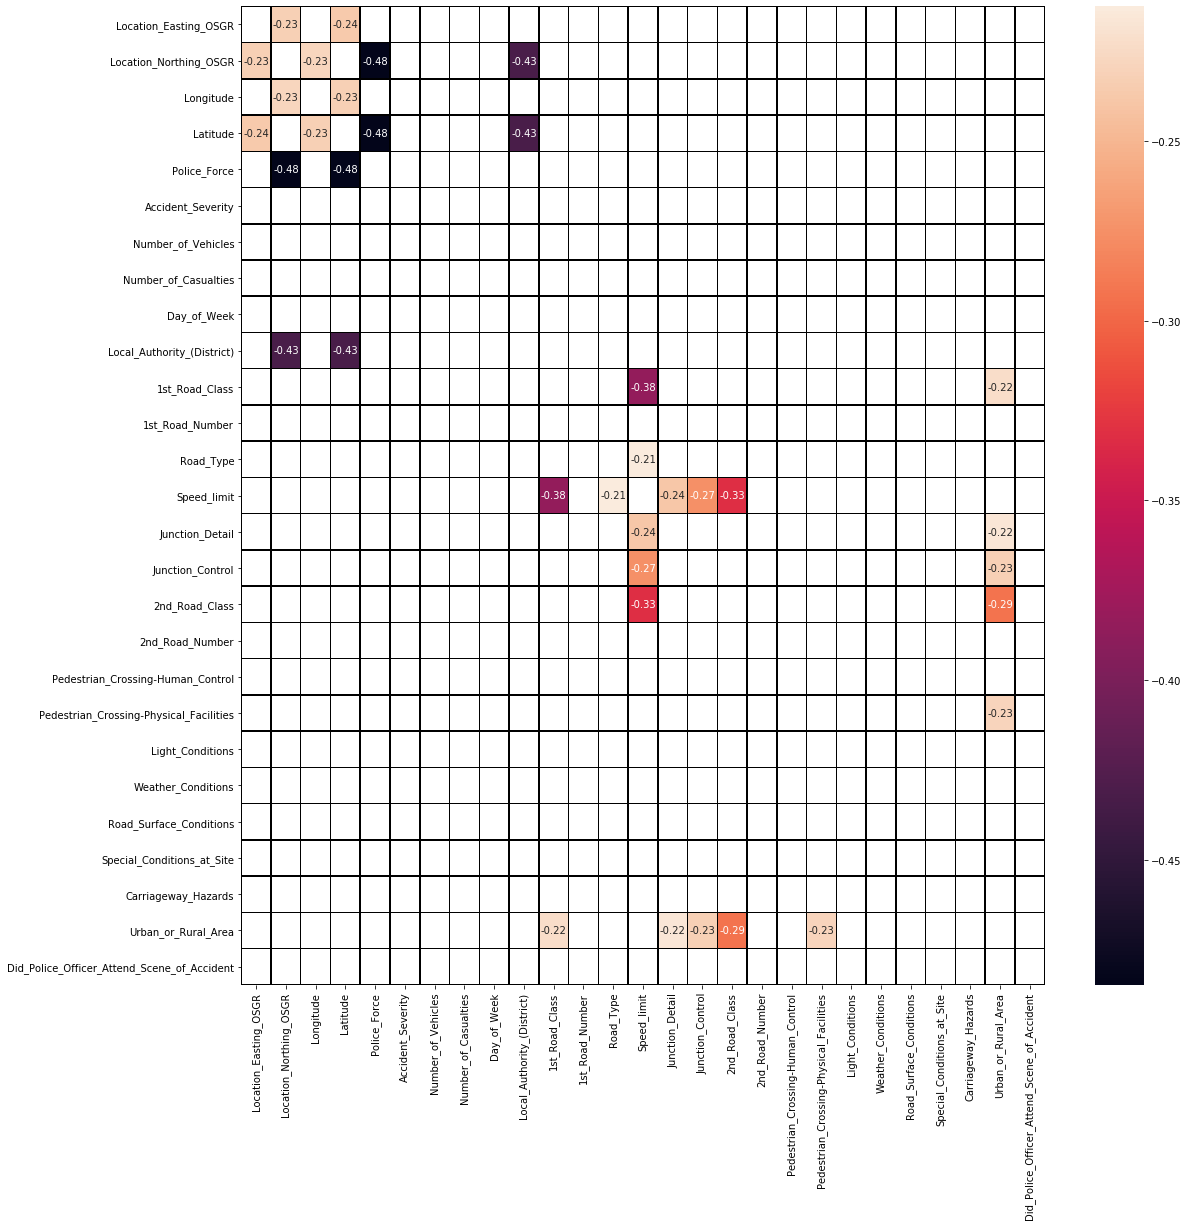

In [10]:
plt.figure(figsize=(18,18))
neg_correlation=corr[corr<-0.2]
sns.heatmap(neg_correlation,annot=True,fmt='.2f',linewidths=0.5,linecolor='black')

In [11]:
print(corr['Accident_Severity'].sort_values(ascending=False))

Accident_Severity                              1.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.115887
Number_of_Vehicles                             0.074712
Junction_Control                               0.066934
2nd_Road_Class                                 0.062628
Junction_Detail                                0.044514
2nd_Road_Number                                0.025825
Weather_Conditions                             0.022602
Road_Surface_Conditions                        0.011960
1st_Road_Class                                 0.011070
Pedestrian_Crossing-Physical_Facilities        0.005375
Pedestrian_Crossing-Human_Control              0.004529
Location_Easting_OSGR                          0.003294
Longitude                                      0.003195
Day_of_Week                                    0.002994
Special_Conditions_at_Site                     0.002685
Carriageway_Hazards                            0.000346
1st_Road_Number                               -0

In [12]:
for col in df.columns:
    print('column- {} : {}'.format(col,df[col].nunique()))

column- Accident_Index : 1519998
column- Location_Easting_OSGR : 170821
column- Location_Northing_OSGR : 190868
column- Longitude : 1052463
column- Latitude : 984176
column- Police_Force : 48
column- Accident_Severity : 3
column- Number_of_Vehicles : 27
column- Number_of_Casualties : 48
column- Date : 3652
column- Day_of_Week : 7
column- Time : 1439
column- Local_Authority_(District) : 391
column- Local_Authority_(Highway) : 182
column- 1st_Road_Class : 6
column- 1st_Road_Number : 6869
column- Road_Type : 6
column- Speed_limit : 8
column- Junction_Detail : 10
column- Junction_Control : 6
column- 2nd_Road_Class : 7
column- 2nd_Road_Number : 7300
column- Pedestrian_Crossing-Human_Control : 4
column- Pedestrian_Crossing-Physical_Facilities : 7
column- Light_Conditions : 5
column- Weather_Conditions : 10
column- Road_Surface_Conditions : 6
column- Special_Conditions_at_Site : 9
column- Carriageway_Hazards : 7
column- Urban_or_Rural_Area : 2
column- Did_Police_Officer_Attend_Scene_of_Accide

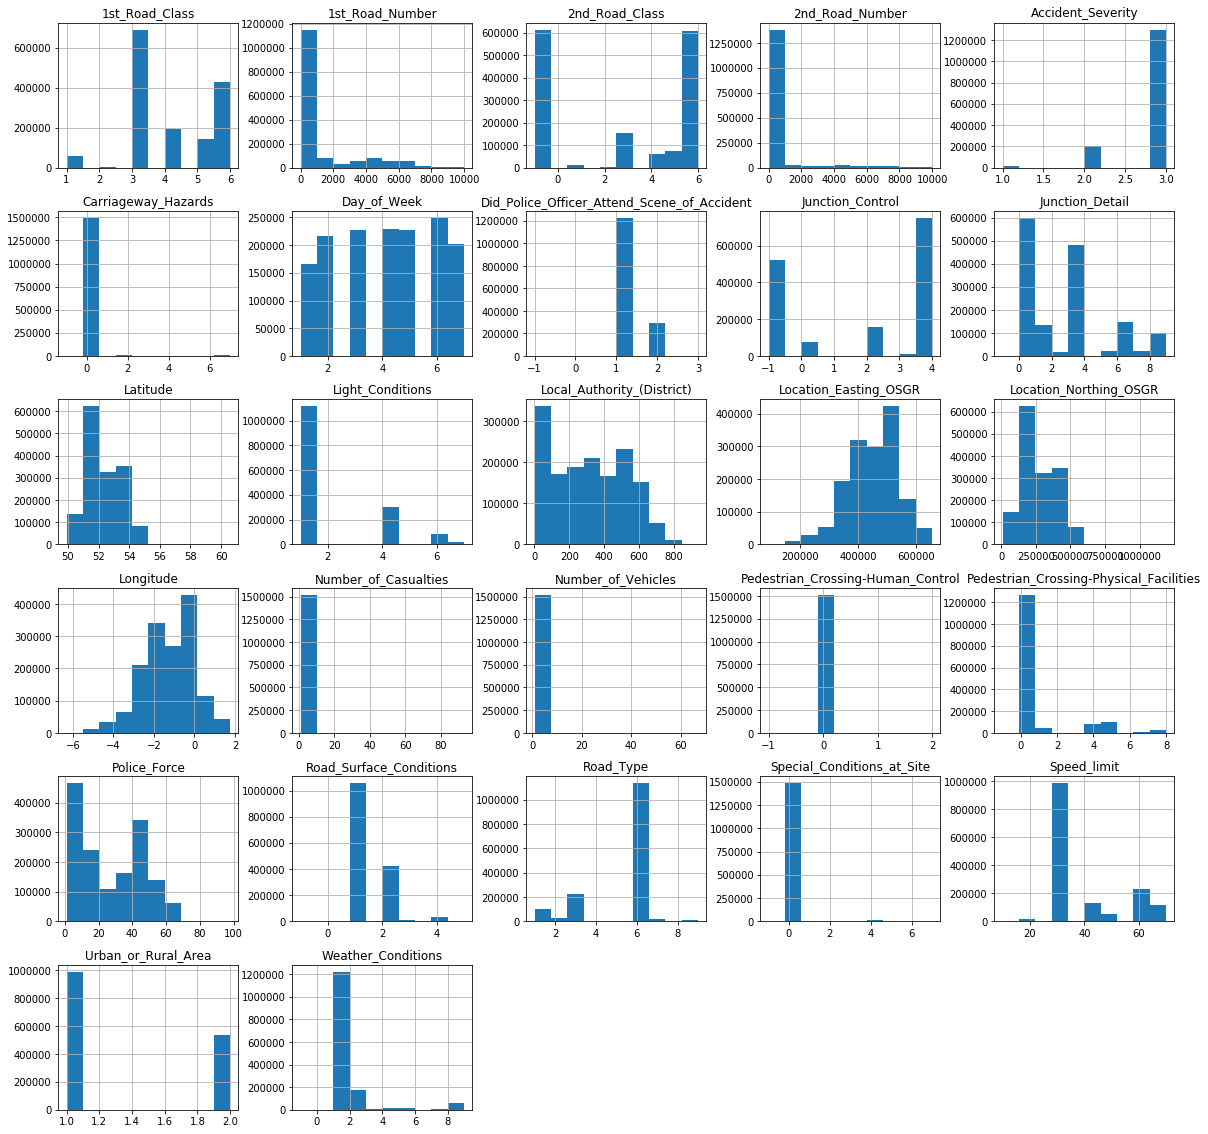

In [13]:
df1=df.select_dtypes(['int64','float64'])
df1.hist(figsize=(20,20));

In [14]:
df1.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [15]:
dataframe=df.copy()

# Feature engineering

### Police Force column

In [16]:
pd.crosstab(df['Police_Force'],df['Accident_Severity'])

Accident_Severity,1,2,3
Police_Force,,,
1,1655,27310,210581
3,301,1996,12497
4,510,7527,37697
5,325,4917,28892
6,638,6956,54084
7,425,5125,26172
10,371,4411,32956
11,232,1925,12492
12,520,4744,17649


In [17]:
df=df[df['Police_Force']<64]

### Number of vehicles column

In [18]:
pd.crosstab(df['Number_of_Vehicles'],df['Accident_Severity'])

Accident_Severity,1,2,3
Number_of_Vehicles,,,
1,8587,86936,352041
2,7605,97460,809634
3,1983,13364,107395
4,597,3038,22495
5,171,840,4764
6,77,304,1411
7,32,120,493
8,23,63,227
9,12,14,108


In [19]:
df=df[df['Number_of_Vehicles']<9]

### Number of casualities column

In [20]:
pd.crosstab(df['Number_of_Casualties'],df['Accident_Severity'])

Accident_Severity,1,2,3
Number_of_Casualties,,,
1,10689,148530,1003351
2,4442,32617,208939
3,1905,11733,56669
4,1048,5184,19220
5,513,2310,6563
6,250,1025,2248
7,111,345,751
8,45,149,312
9,19,75,151


In [21]:
df=df[df['Number_of_Casualties']<10]

### Day of week column

In [22]:
pd.crosstab(df['Day_of_Week'],df['Accident_Severity'])

Accident_Severity,1,2,3
Day_of_Week,,,
1,3041,26238,137033
2,2471,27261,186293
3,2440,28643,196655
4,2405,28591,198134
5,2488,29212,196440
6,2909,32281,213833
7,3268,29742,169816


This column is not useful in predicting severity as every day has almost same number of accidents with severity 1,2,3.We need to delete that column.

### 1st Road Class column

In [23]:
pd.crosstab(df['1st_Road_Class'],df['Accident_Severity'])

Accident_Severity,1,2,3
1st_Road_Class,,,
1,1009,5846,52438
2,83,427,3498
3,10477,91773,588583
4,2693,27978,161960
5,1713,19368,121280
6,3047,56576,370445


### 1st Road Number column

In [24]:
pd.crosstab(df['1st_Road_Number'],df['Accident_Severity'])[:500]

Accident_Severity,1,2,3
1st_Road_Number,,,
0,2853,52619,343812
1,375,2126,17428
2,79,807,6571
3,103,1234,8002
4,222,1739,13197
5,215,1341,9074
6,336,2190,15372
7,11,104,777
8,11,91,475


'1st_Road_Number' column contains large number of values which are ununiformly distributed wit no relation to the target variable.We can delete this column.

### Road type column

In [25]:
pd.crosstab(df['Road_Type'],df['Accident_Severity'])

Accident_Severity,1,2,3
Road_Type,,,
1,322,9004,94583
2,207,3843,27086
3,3879,26327,193794
6,14426,160583,960961
7,128,1390,14361
9,60,821,7419


### Speed Limit column

In [26]:
pd.crosstab(df['Speed_limit'],df['Accident_Severity'])

Accident_Severity,1,2,3
Speed_limit,,,
10,0,1,3
15,0,0,2
20,97,2275,13785
30,6478,120185,856514
40,1844,17231,109236
50,1092,7279,40997
60,6953,41828,180680
70,2558,13169,96987


In [27]:
df=df[df['Speed_limit']>15]

### Junction Detail column

In [28]:
pd.crosstab(df['Junction_Detail'],df['Accident_Severity'])

Accident_Severity,1,2,3
Junction_Detail,,,
-1,0,0,7
0,11969,92480,494099
1,408,11091,122249
2,66,1504,15008
3,4131,62292,414322
5,308,2258,19227
6,1082,17525,129146
7,131,2328,17730
8,526,7632,49587


In [29]:
df=df[df['Junction_Detail']>-0.1]

### Junction control column

In [30]:
pd.crosstab(df['Junction_Control'],df['Accident_Severity'])

Accident_Severity,1,2,3
Junction_Control,,,
-1,10329,81060,431930
0,1659,11615,63498
1,9,247,2200
2,942,16452,140493
3,68,908,8038
4,6015,91685,652033


### 2nd Road class column

In [31]:
pd.crosstab(df['2nd_Road_Class'],df['Accident_Severity'])

Accident_Severity,1,2,3
2nd_Road_Class,,,
-1,12135,94429,506357
1,90,863,9341
2,10,94,1095
3,821,14388,138636
4,445,6944,52436
5,665,9037,64208
6,4856,76212,526119


### 2nd Road number column

In [32]:
pd.crosstab(df['2nd_Road_Number'],df['Accident_Severity'])[:100]

Accident_Severity,1,2,3
2nd_Road_Number,,,
-1,171,2002,12554
0,16476,164192,986036
1,36,336,3293
2,7,106,1035
3,14,227,1765
4,27,320,2736
5,19,171,1886
6,15,270,2898
7,3,27,200


'2nd_Road_Number' column contains large number of values which are un-uniformly distributed with no relation to the target variable.We can delete this column.

### Pedestrian_Crossing-Human_Control column

In [33]:
pd.crosstab(df['Pedestrian_Crossing-Human_Control'],df['Accident_Severity'])

Accident_Severity,1,2,3
Pedestrian_Crossing-Human_Control,,,
-1,0,2,14
0,18975,201173,1291858
1,12,331,3118
2,35,461,3202


In [34]:
df=df[df['Pedestrian_Crossing-Human_Control']>-0.1]

### Pedestrian_Crossing-Physical_Facilities column

In [35]:
pd.crosstab(df['Pedestrian_Crossing-Physical_Facilities'],df['Accident_Severity'])

Accident_Severity,1,2,3
Pedestrian_Crossing-Physical_Facilities,,,
-1,1,4,20
0,16866,168873,1081224
1,242,5139,36156
4,756,11201,66542
5,649,11607,87250
7,71,542,3868
8,437,4599,23118


In [36]:
df=df[df['Pedestrian_Crossing-Physical_Facilities']>-0.1]

### Light_Conditions column

In [37]:
pd.crosstab(df['Light_Conditions'],df['Accident_Severity'])

Accident_Severity,1,2,3
Light_Conditions,,,
1,11049,139044,963584
4,4137,44200,252292
5,125,962,5501
6,3511,15613,62332
7,199,2142,14449


### Weather_Conditions column

In [38]:
pd.crosstab(df['Weather_Conditions'],df['Accident_Severity'])

Accident_Severity,1,2,3
Weather_Conditions,,,
-1,2,12,143
1,15883,167460,1037217
2,1725,20475,152881
3,71,947,9196
4,344,2715,15847
5,269,2569,17147
6,11,185,1490
7,177,1154,7061
8,292,3659,30366


In [39]:
df=df[df['Weather_Conditions']>-0.1]

### Road_Surface_Conditions column

In [40]:
pd.crosstab(df['Road_Surface_Conditions'],df['Accident_Severity'])

Accident_Severity,1,2,3
Road_Surface_Conditions,,,
-1,12,221,1864
1,13025,143461,898080
2,5581,53699,361552
3,55,858,8173
4,304,3428,26577
5,42,282,1769


### Special_Conditions_at_Site column

In [41]:
pd.crosstab(df['Special_Conditions_at_Site'],df['Accident_Severity'])

Accident_Severity,1,2,3
Special_Conditions_at_Site,,,
-1,0,0,5
0,18680,197254,1266136
1,29,266,2436
2,8,85,661
3,22,289,1956
4,180,1800,15667
5,37,763,2807
6,35,874,4195
7,28,618,4152


In [42]:
df=df[df['Special_Conditions_at_Site']>-0.1]

### Carriageway_Hazards column

In [43]:
pd.crosstab(df['Carriageway_Hazards'],df['Accident_Severity'])

Accident_Severity,1,2,3
Carriageway_Hazards,,,
-1,0,1,13
0,18645,198369,1275491
1,20,180,1422
2,170,1621,9561
3,86,340,1789
6,37,378,2984
7,61,1060,6750


In [44]:
df=df[df['Carriageway_Hazards']>-0.1]

### Urban_or_Rural_Area column

In [45]:
pd.crosstab(df['Urban_or_Rural_Area'],df['Accident_Severity'])

Accident_Severity,1,2,3
Urban_or_Rural_Area,,,
1,6922,119350,861401
2,12097,82598,436596


### Did_Police_Officer_Attend_Scene_of_Accident column

In [46]:
pd.crosstab(df['Did_Police_Officer_Attend_Scene_of_Accident'],df['Accident_Severity'])

Accident_Severity,1,2,3
Did_Police_Officer_Attend_Scene_of_Accident,,,
-1,6,46,210
1,18756,183802,1022238
2,252,17941,272799
3,5,159,2750


# Feature selection

In [47]:
X=df.drop(['Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Accident_Severity',
           'Date','Day_of_Week','Time','Local_Authority_(District)','Local_Authority_(Highway)',
           '1st_Road_Number','2nd_Road_Class','2nd_Road_Number','LSOA_of_Accident_Location'],axis=1)
y=df['Accident_Severity']

In [48]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [49]:
len(df)

1518964

## GaussianNB classifier

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [52]:
X_train.shape,X_test.shape

((1063274, 19), (455690, 19))

In [53]:
y_train.shape,y_test.shape

((1063274,), (455690,))

In [54]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
model.score(X_train,y_train)

0.7879718680227298

In [56]:
preds=model.predict(X_test)

In [57]:
accuracy_score(preds,y_test)

0.7883100353310365

In [58]:
confusion_matrix(preds,y_test)

array([[  1844,   7775,  27921],
       [   129,   1288,   5594],
       [  3783,  51263, 356093]])

## Decision Tree classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
train_x=X_train.drop(['Longitude','Latitude'],axis=1)
test_x=X_test.drop(['Longitude','Latitude'],axis=1)

In [61]:
clf=DecisionTreeClassifier()
clf.fit(train_x,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
clf.score(train_x,y_train)

0.8997991110475757

In [63]:
preds1=clf.predict(test_x)

In [64]:
accuracy_score(preds1,y_test)

0.8019267484474094